In [1]:
from phomo import Mosaic, Master, Pool

/home/lcoyle/.cache/pypoetry/virtualenvs/phomo-pX3Qwu7w-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pool = Pool.from_dir("faces/", crop_ratio=1, tile_size=(20, 20))

Loading tiles: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 9780/9780 [00:04<00:00, 2113.38it/s]


In [3]:
from random import sample
from pathlib import Path

master_file = sample(list(Path("faces").glob('*')), 1)[0]

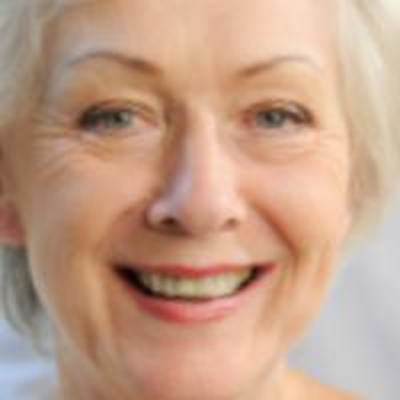

In [4]:
master = Master.from_file(master_file, img_size=(400, 400))
master.img

In [5]:
mosaic = Mosaic(master, pool)

# Serial computation

In [6]:
%time mosaic.build(mosaic.d_matrix());

Building distance matrix: 100%|███████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:17<00:00, 22.28it/s]


dmatrix (400, 9780)


Building mosaic: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 246868.98it/s]

CPU times: user 9.8 s, sys: 8.33 s, total: 18.1 s
Wall time: 18.1 s


# Multiple cores
Using multple cores somewhat breaks the tqdm progress bar.

In [7]:
%time mosaic.build(mosaic.d_matrix(workers=2));

Building distance matrix: 100%|███████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:10<00:00, 36.89it/s]


dmatrix (400, 9780)


Building mosaic: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 222657.15it/s]

CPU times: user 218 ms, sys: 75.7 ms, total: 293 ms
Wall time: 11.1 s


In [8]:
%time mosaic.build(mosaic.d_matrix(workers=4));

Building distance matrix: 100%|███████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:09<00:00, 42.10it/s]


dmatrix (400, 9780)


Building mosaic: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 210293.51it/s]

CPU times: user 289 ms, sys: 96.4 ms, total: 385 ms
Wall time: 9.75 s


In [9]:
%time mosaic.build(mosaic.d_matrix(workers=8));

Building distance matrix: 100%|███████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:10<00:00, 38.22it/s]


dmatrix (400, 9780)


Building mosaic: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 130318.60it/s]

CPU times: user 437 ms, sys: 279 ms, total: 716 ms
Wall time: 10.8 s


In [10]:
%time mosaic.build(mosaic.d_matrix(workers=16));

Building distance matrix: 100%|███████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:12<00:00, 33.28it/s]


dmatrix (400, 9780)


Building mosaic: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 225803.71it/s]

CPU times: user 906 ms, sys: 478 ms, total: 1.38 s
Wall time: 12.4 s


On my system it seems using more that when going above 4 cores, the overhead slows downs the computation.

# Running on GPU

Running on `RTX 2060 SUPER` requires installing with `pip install 'phomo[cuda]'`

In [11]:
%time mosaic.build(mosaic.d_matrix_cuda());

dmatrix (400, 9780)


Building mosaic: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 154543.26it/s]

CPU times: user 687 ms, sys: 113 ms, total: 800 ms
Wall time: 799 ms
